<a href="https://colab.research.google.com/github/jaewoong-87/machine-learning/blob/main/Linear_Model_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

linear modles

Mean Squared Error.

various ways to measure error in linear model

MAE

MAPE

MSE

MPE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

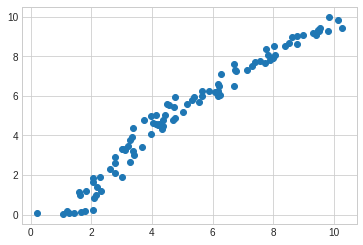

In [ ]:
noise = np.random.rand(100, 1)
X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100, 1))

plt.scatter(X, y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("linear regression weight{}".format(model.coef_))
print("linear regression bias{}".format(model.intercept_))

linear regression weight[[1.08000313]]
linear regression bias[-0.46867367]


In [ ]:
print("edu data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

edu data score:0.9578936380253709
estimate data score:0.9309331840713108


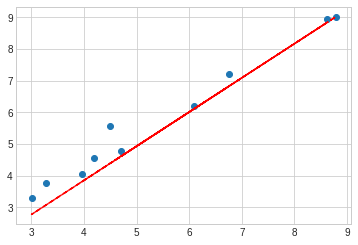

In [ ]:
predict = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r')

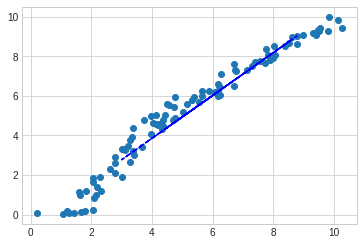

In [ ]:
plt.scatter(X, y)
plt.plot(X_test, predict, '--b')

size of test data was low so that efficiency of learning was low too.

example (boston house price data)

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [ ]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
boston_df.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

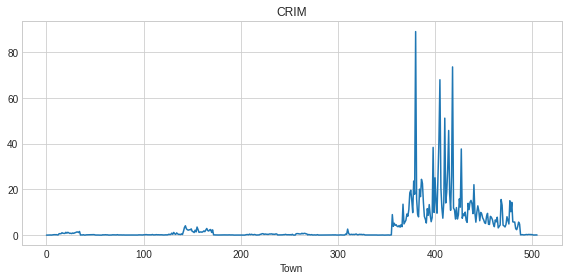

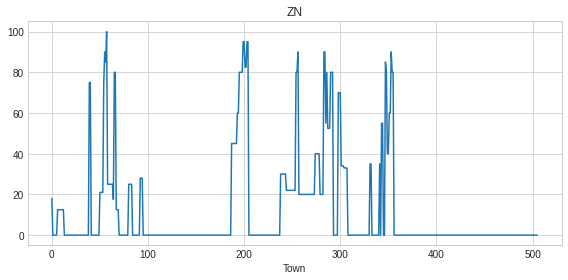

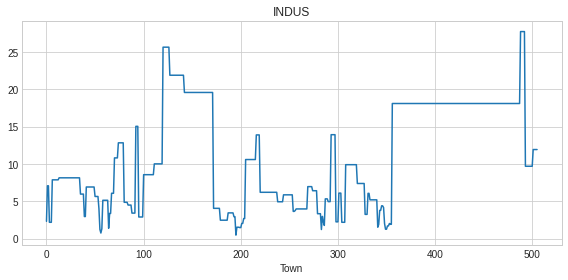

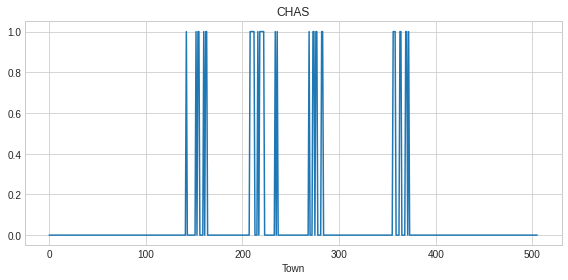

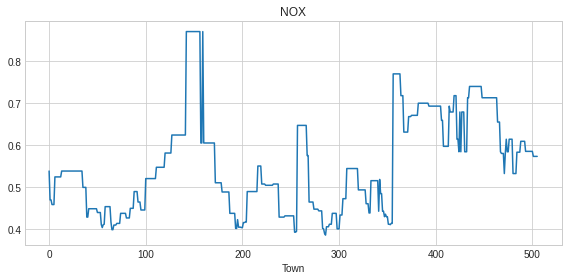

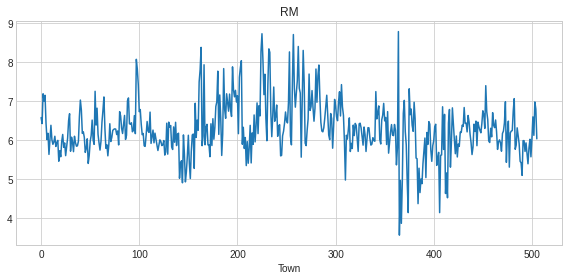

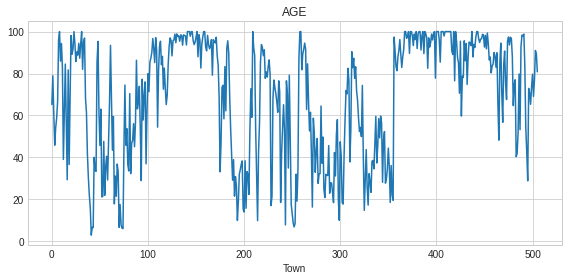

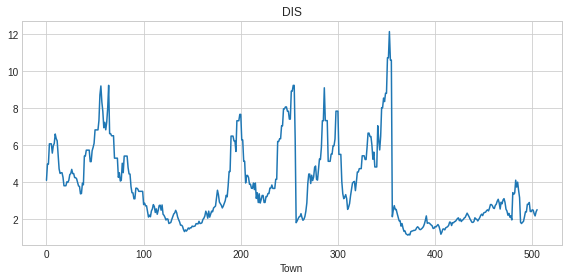

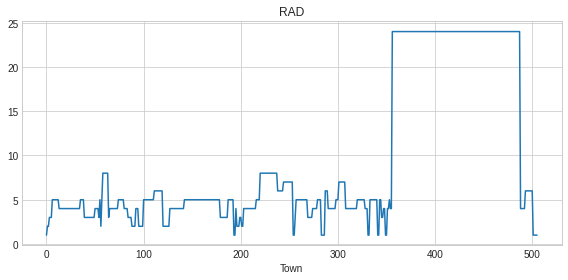

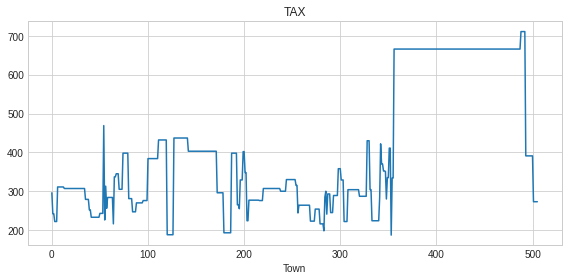

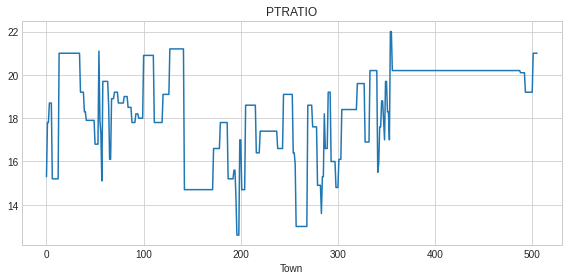

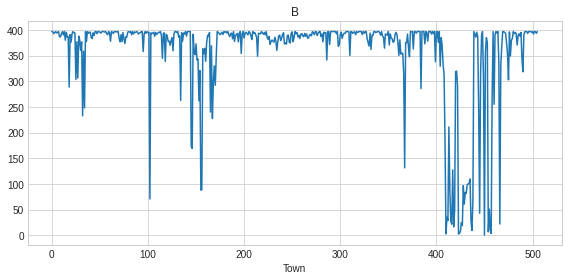

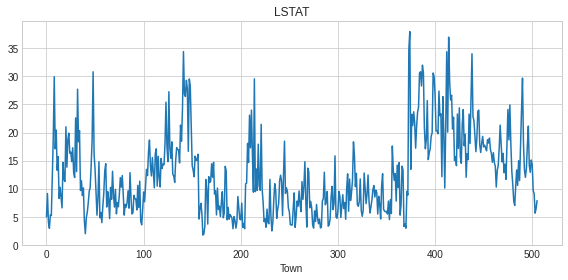

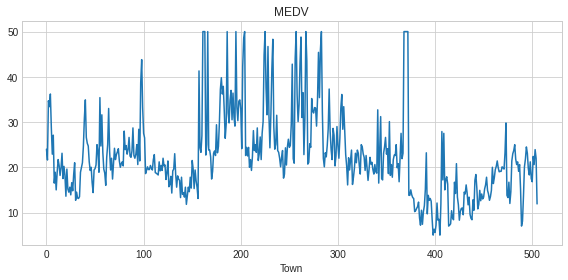

In [ ]:
for i, col in enumerate(boston_df.columns):
  plt.figure(figsize=(8, 4))
  plt.plot(boston_df[col])
  plt.title(col)
  plt.xlabel('Town')
  plt.tight_layout()

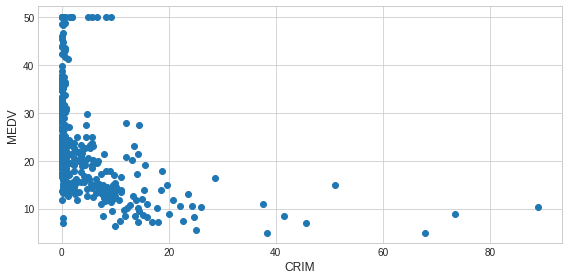

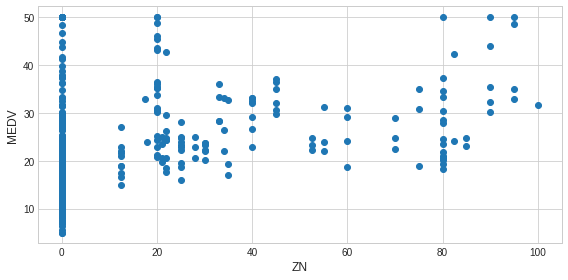

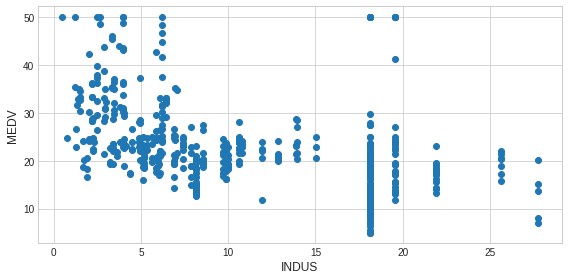

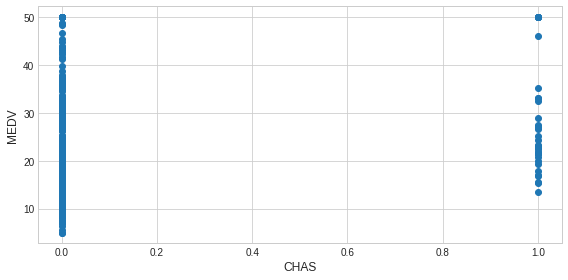

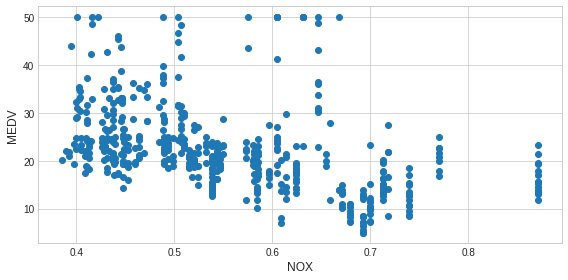

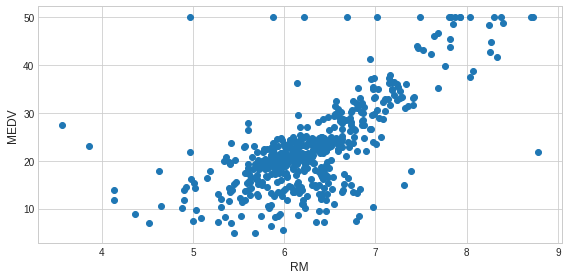

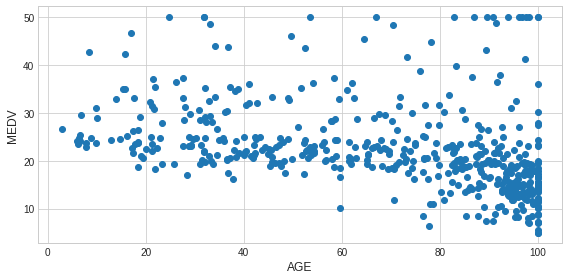

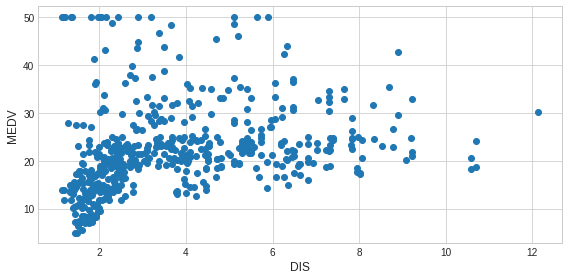

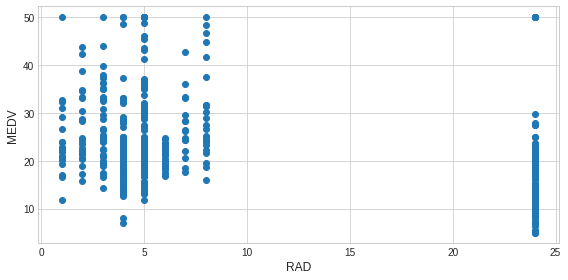

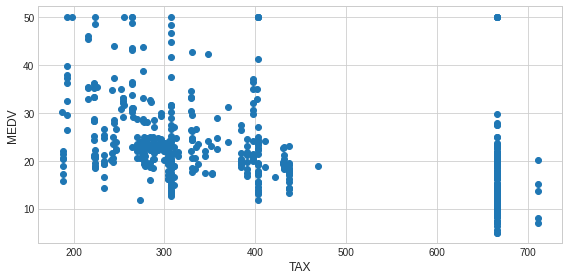

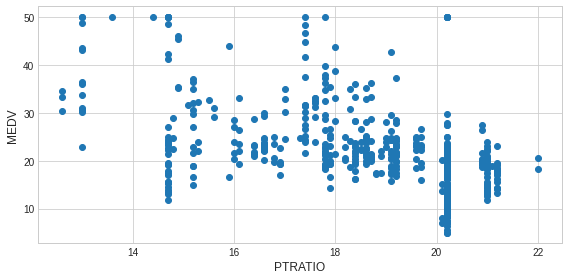

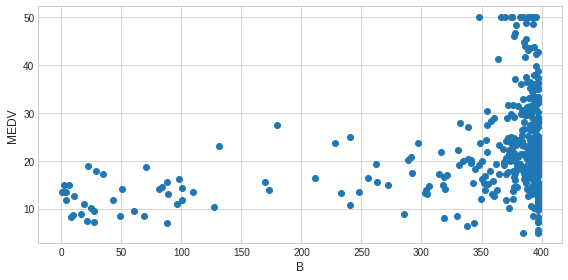

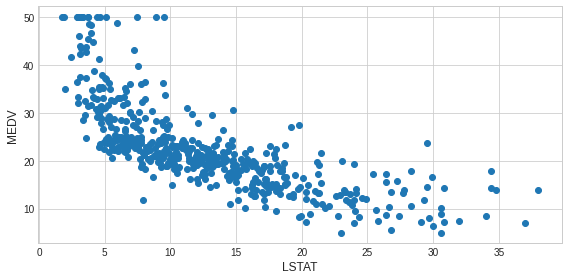

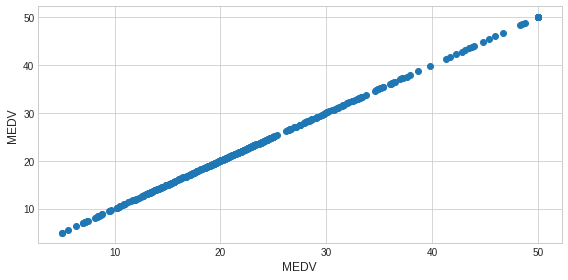

In [ ]:
for i, col in enumerate(boston_df.columns):
  plt.figure(figsize=(8, 4))
  plt.scatter(boston_df[col], boston_df['MEDV'])
  plt.ylabel('MEDV', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

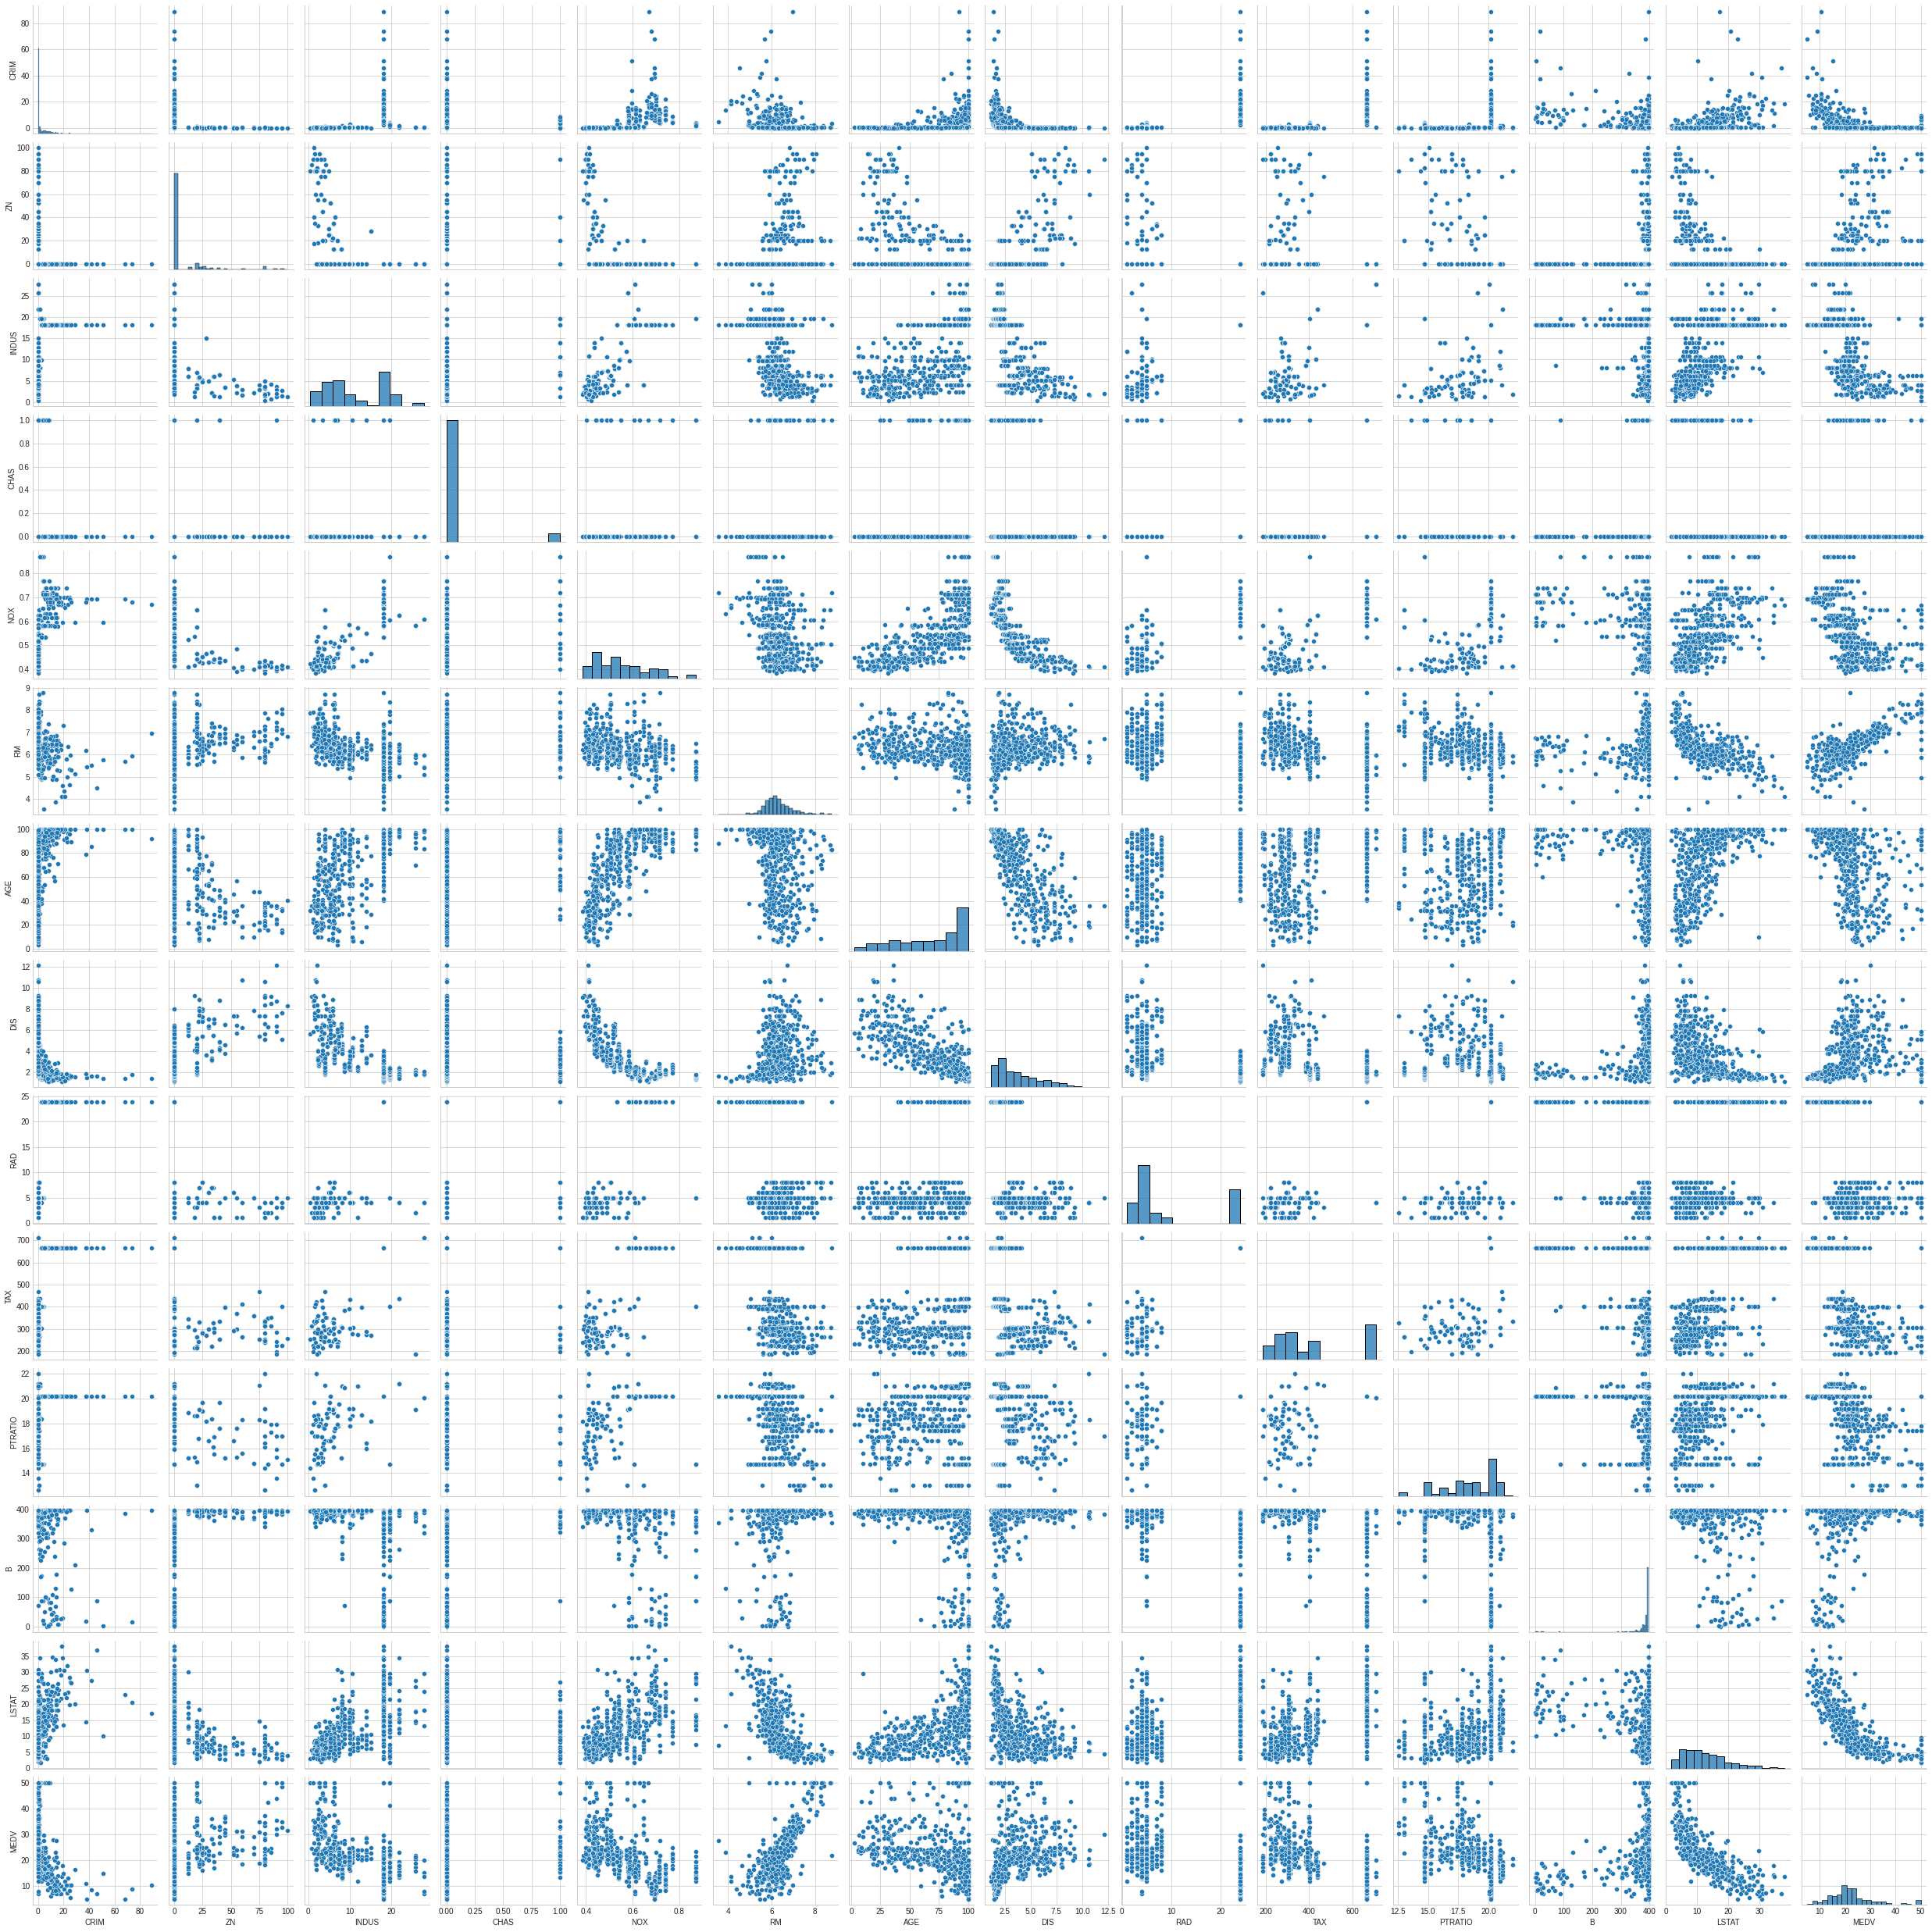

In [ ]:
import seaborn as sns

sns.pairplot(boston_df);

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7519253281914224

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.7354849403398462
estimate data score:0.7519253281914224


if amount of sample is low, we can do cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print("NMSE scores:{}".format(scores))
print("NMSE scores mean:{}".format(scores.mean()))
print("NMSE scores mean:{}".format(scores.std()))

NMSE scores:[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean:-34.70525594452485
NMSE scores mean:45.57399920030876


R2 coefficient of determination.

In [ ]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')
print("R2 scores:{}".format(r2_scores))
print("R2 scores mean:{}".format(r2_scores.mean()))
print("R2 scores mean:{}".format(r2_scores.std()))

R2 scores:[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean:0.20252899006056357
R2 scores mean:0.5952960169512289


intercept_

coef_

In [ ]:
print('y = ' + str(model.intercept_) + '')
for i, c in enumerate(model.coef_):
  print(str(c) + '* x' + str(i))

y = 41.983166062096785
-0.12205121670655437* x0
0.053318655345936376* x1
0.027728382498535313* x2
2.330023797749723* x3
-18.96399148200447* x4
3.371220229101672* x5
-0.00014473800743842671* x6
-1.5778669615480012* x7
0.31980988748625705* x8
-0.012768997476134532* x9
-1.024402854293428* x10
0.009158123419647711* x11
-0.5389486337466604* x12


size of feature = 13. 

41.9~~ bias. and another number were weight of each linear regress.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, predict)))
r2 = r2_score(y_train, predict)

print('RMSE:{}'.format(rmse))
print('R2 score:{}'.format(r2))


RMSE:4.778645943503746
R2 score:0.7354849403398462


In [ ]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE:{}'.format(rmse))
print('R2 score:{}'.format(r2))

RMSE:4.327504866631127
R2 score:0.7519253281914224


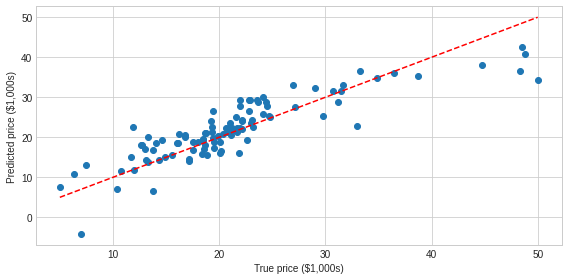

In [ ]:
def plot_boston_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)


califonia house price data

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the 

In [ ]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]

In [ ]:
california_df.describe()

MedInc      HouseAge  ...     Longitude        target
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]

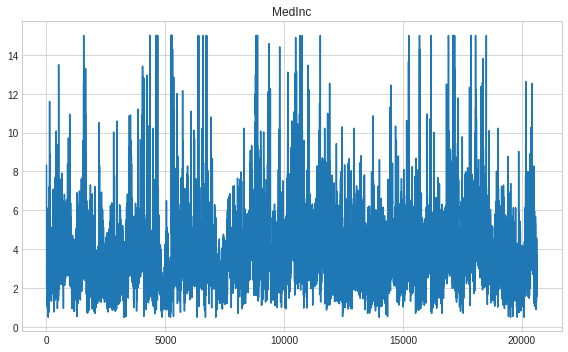

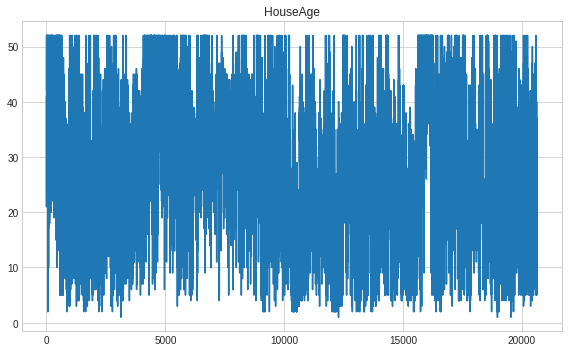

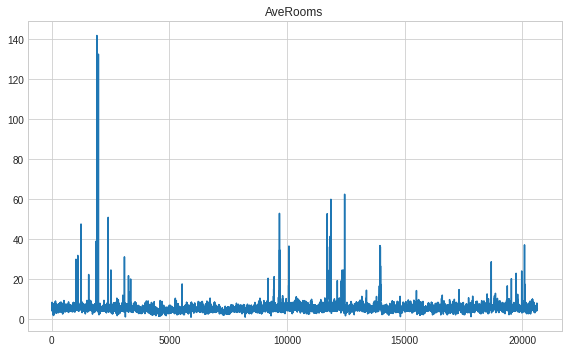

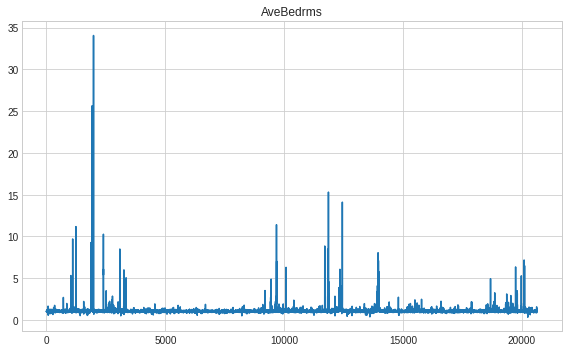

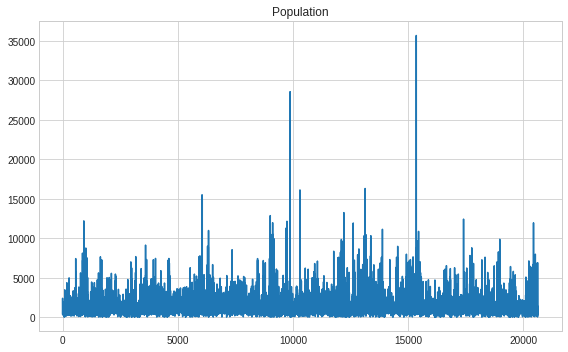

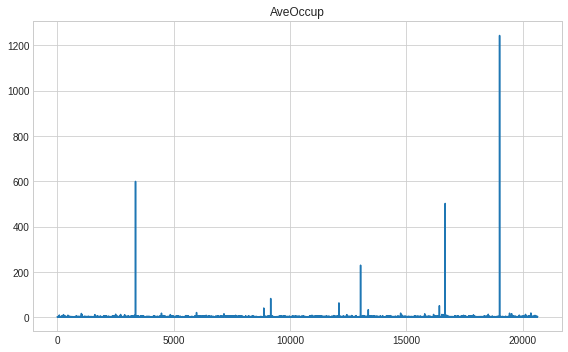

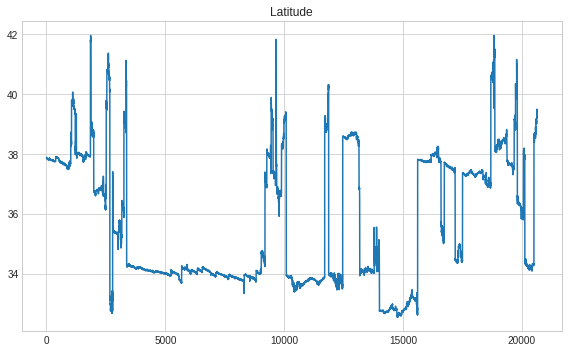

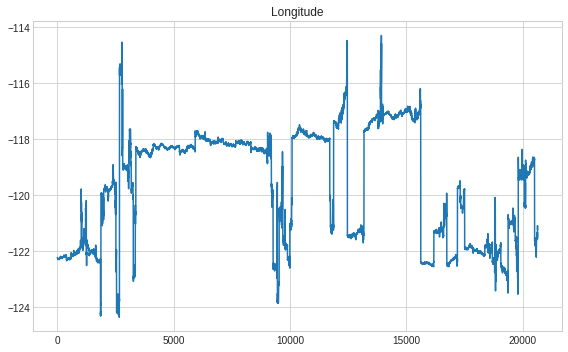

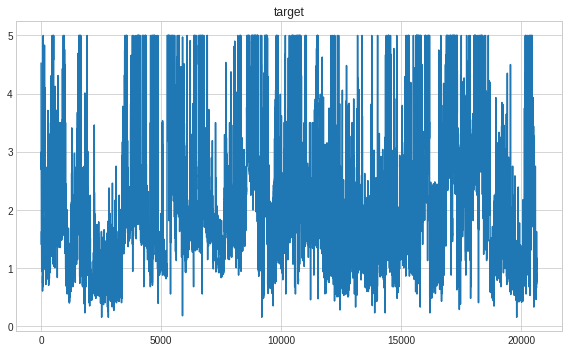

In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

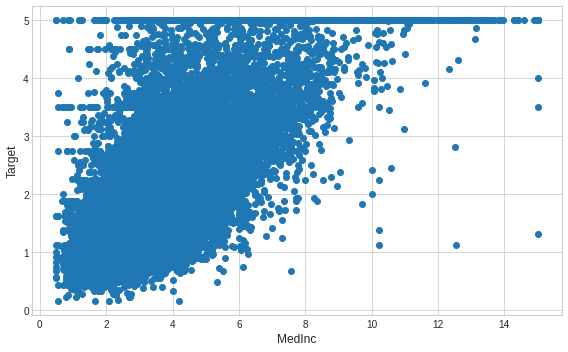

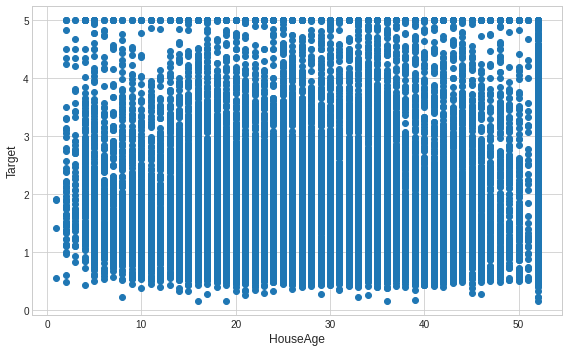

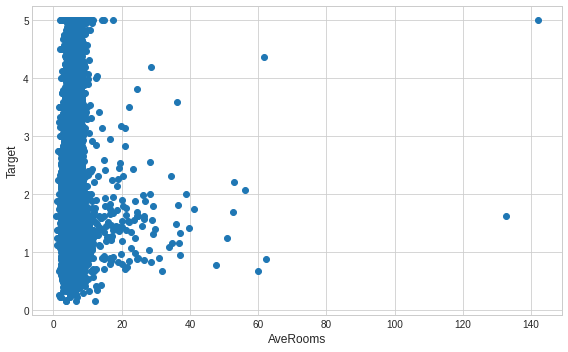

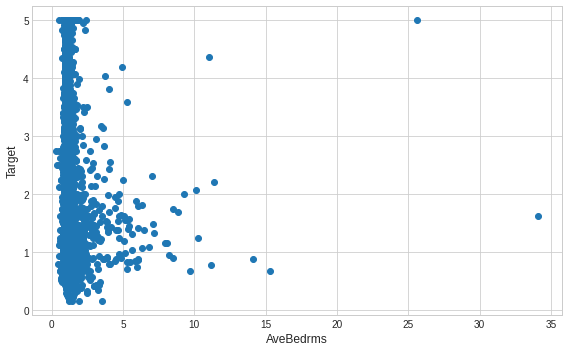

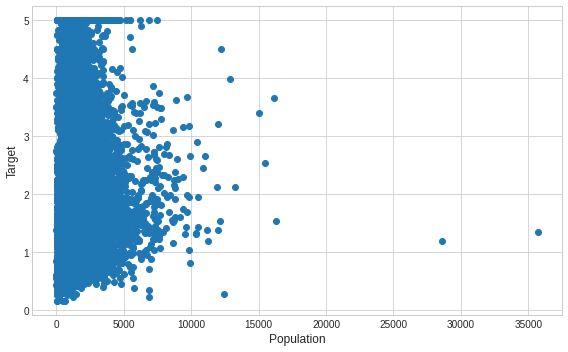

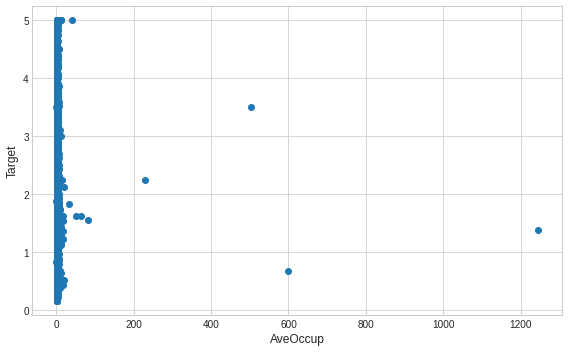

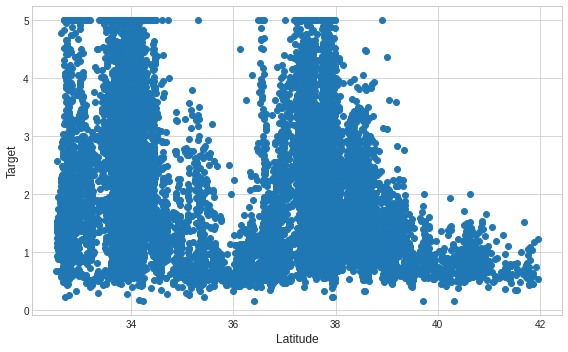

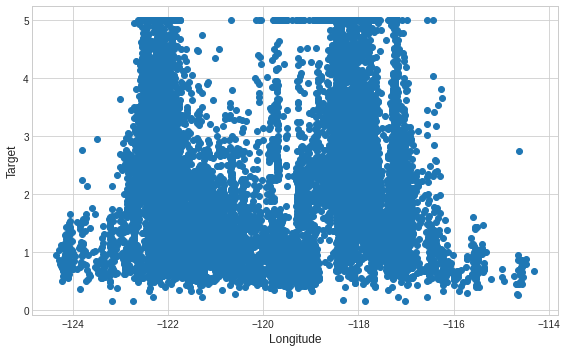

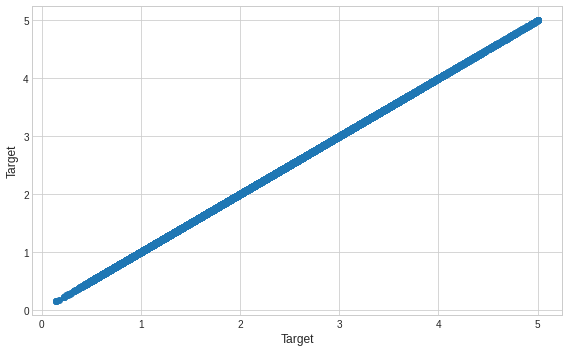

In [ ]:
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

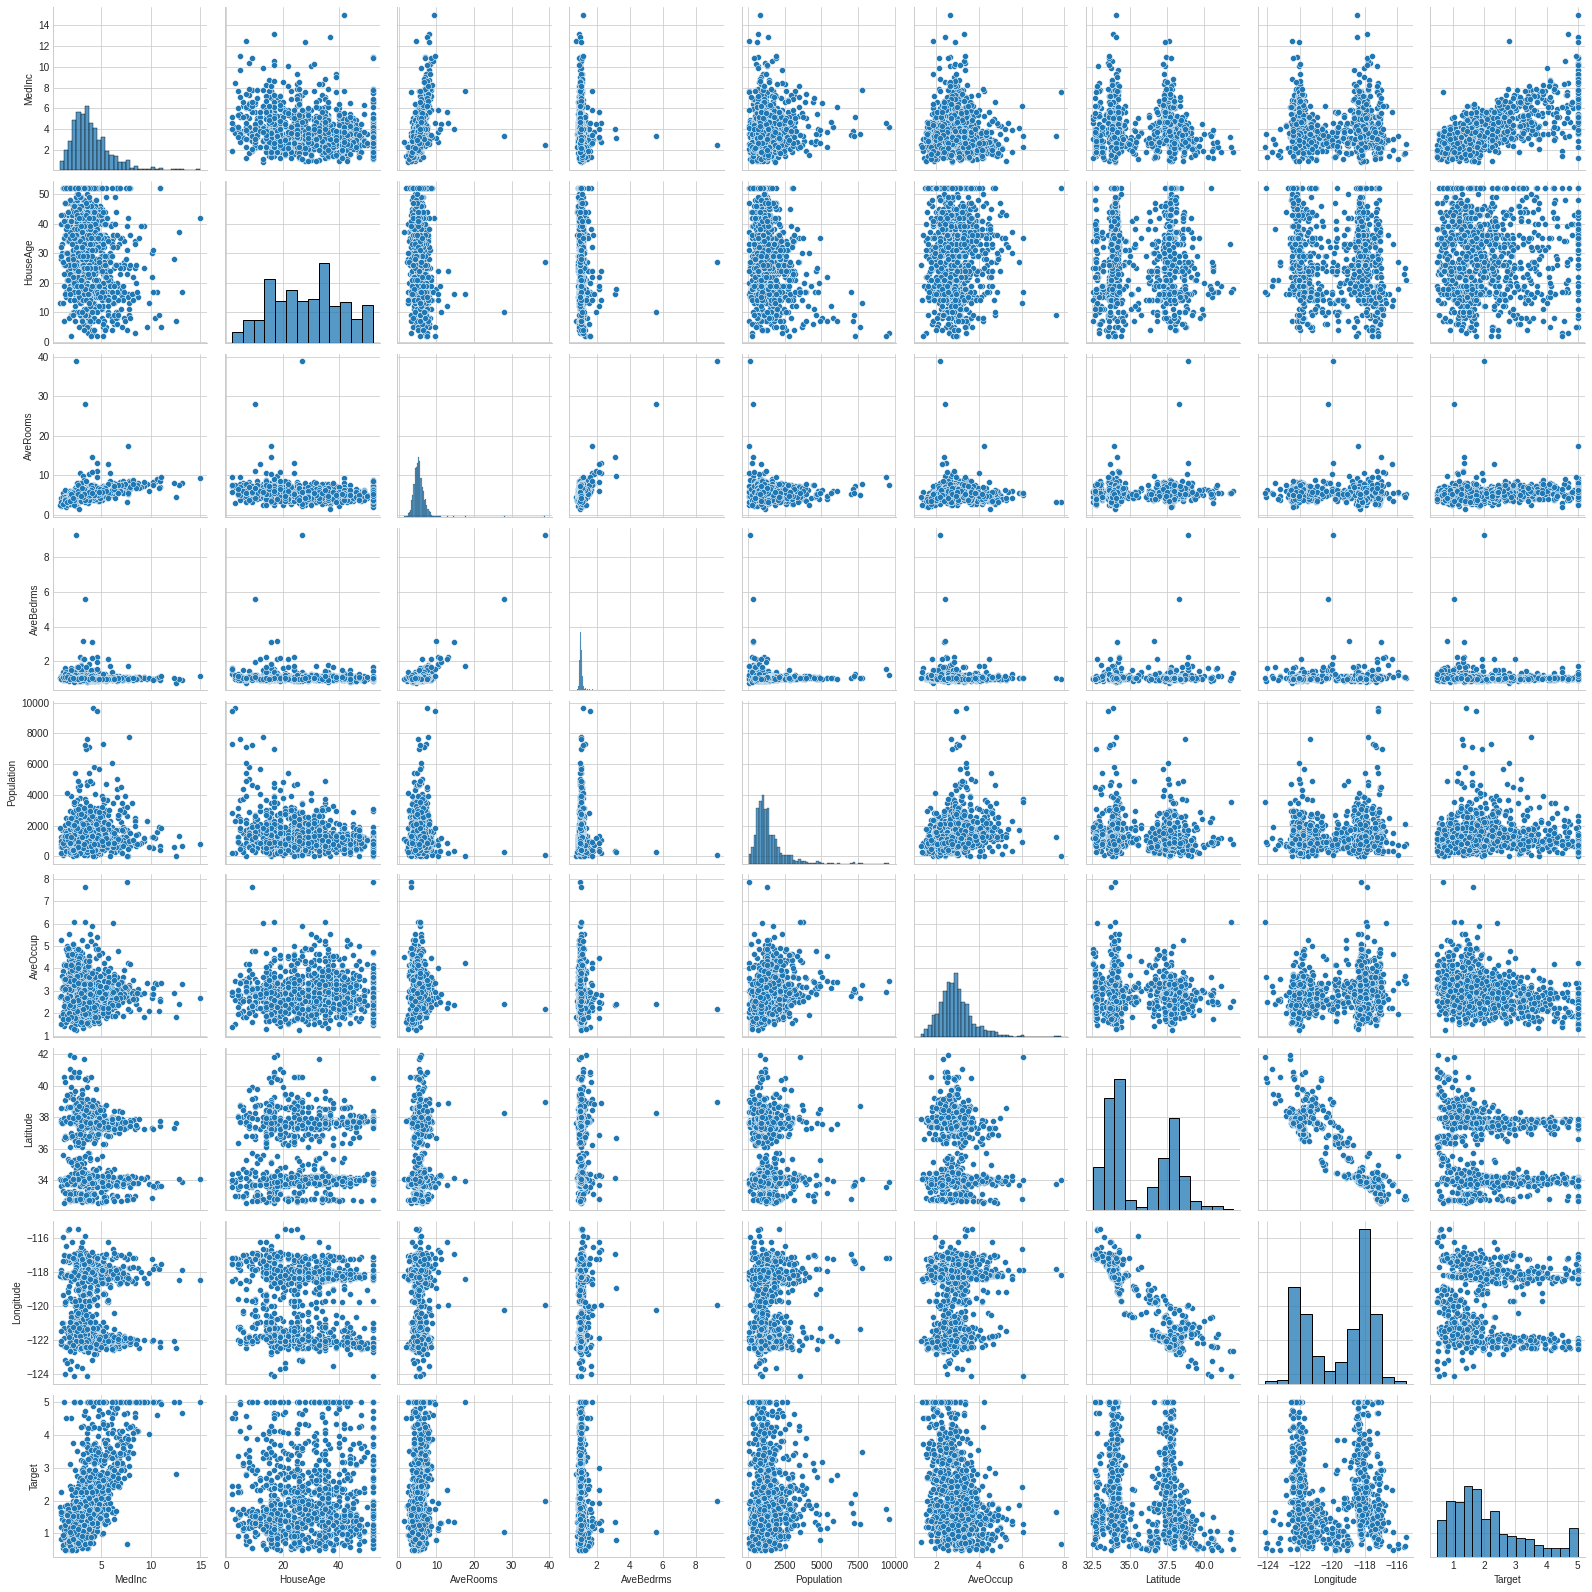

In [ ]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));

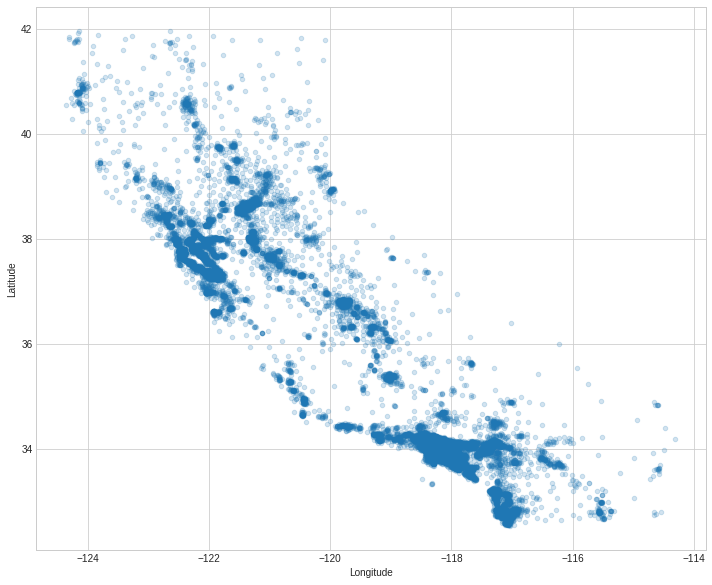

In [ ]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10))

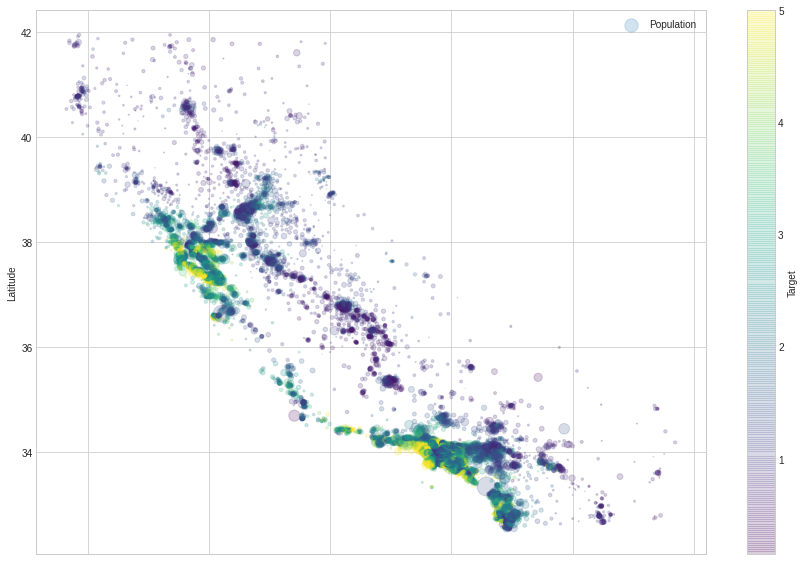

In [ ]:

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,
                   s=california_df['Population']/100, label='Population', figsize=(15, 10),
                   c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

In [ ]:
model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)
print('learning Scores:{}'.format(model.score(X_train, y_train)))
print('estimate Scores:{}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('nmse mean:{}'.format(scores.mean()))
print('nmse std:{}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 mean:{}'.format(r2_scores.mean()))

learning Scores:0.6105772929405733
estimate Scores:0.5804554290063995
nmse mean:-0.5509524296956642
nmse std:0.19288582953865108
R2 mean:0.5110068610523768


In [ ]:
print('y='+str(model.intercept_)+'')
for i, c in enumerate(model.coef_):
  print(str(c)+ '* x ' +str(i))

y=-37.21065139152472
0.4458563103874817* x 0
0.009185122386340167* x 1
-0.12375084681030407* x 2
0.8122427846052822* x 3
-6.417774995042354e-06* x 4
-0.004852779811393144* x 5
-0.4221588175291077* x 6
-0.4360357408303077* x 7


In [ ]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('rmse:{}'.format(rmse))
print('r2 score:{}'.format(r2))

rmse:0.7191369380341079
r2 score:0.6105772929405733


In [ ]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('rmse:{}'.format(rmse))
print('r2 score:{}'.format(r2))

rmse:0.7512978705075793
r2 score:0.5804554290063995


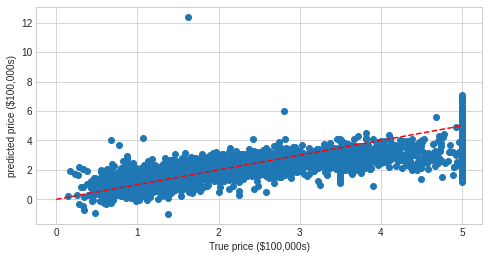

In [ ]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5],[0, 5], '--r')
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('predicted price ($100,000s)')
  plt.tight_layout

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.7191577436715871
estimate data score:0.7902222897439038


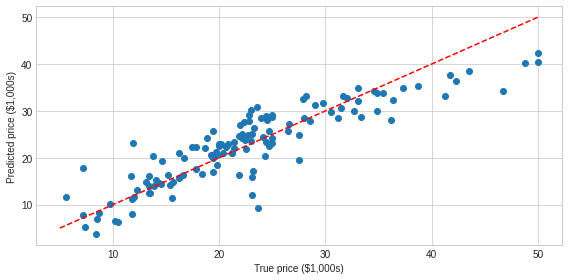

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

california ridge regression

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [ ]:
model= Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.6068294787213047
estimate data score:0.6032860100615774


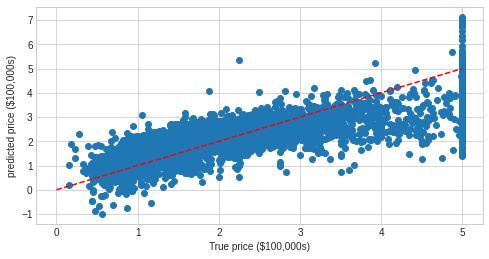

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

Lasso Regression for boston housing price.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.7536017048530033
estimate data score:0.6723478682701178


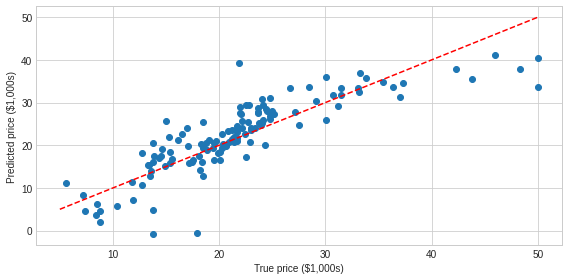

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

Lasso for california housing price.

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [ ]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.6102259971351264
estimate data score:0.5892458287095828


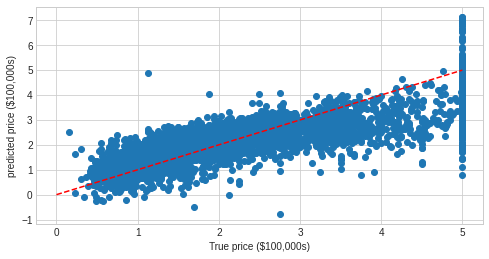

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

Elastic-Net(combined with ridge + lasso)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.7252594041096124
estimate data score:0.7564842154670938


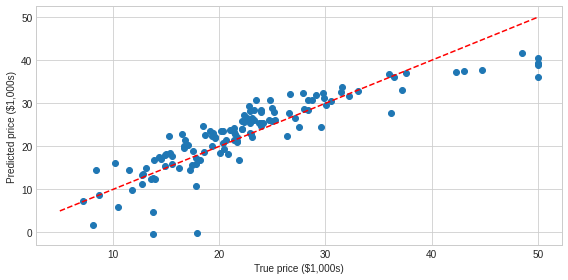

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

Elastic net with california hosuing price

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [ ]:
model= ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.6023671270420278
estimate data score:0.6112694765531628


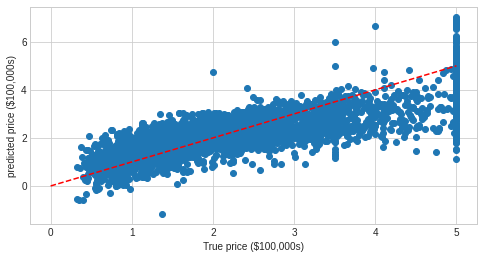

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

Orthogonal Matchin Pursuit

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=7, normalize=True,
                          precompute='auto', tol=None)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.6994253468342848
estimate data score:0.7905728073834088


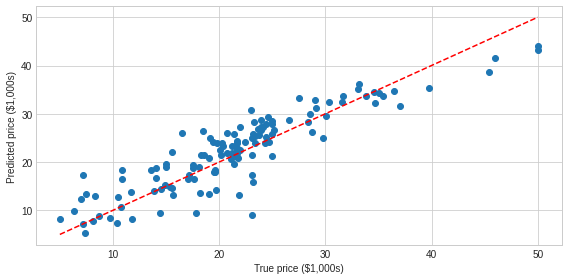

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

polynomial regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
print("learning data score:{}".format(model.score(X_train, y_train)))
print("estimate data score:{}".format(model.score(X_test, y_test)))

learning data score:0.9346787783950696
estimate data score:0.825786471800239


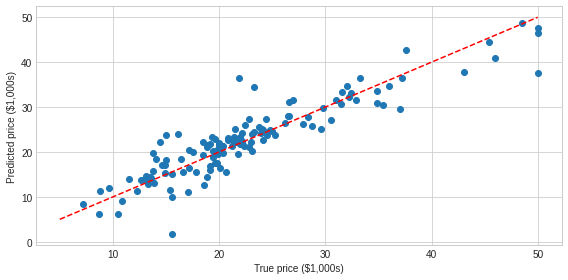

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)